In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seoul_bike = pd.read_csv('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv', encoding='cp949')

In [6]:
seoul_bike.describe()

,대여건수,평균기온,강수량
count,455.000000,455.000000,152.000000
mean,26366.613187,10.913407,8.780921
std,15476.046814,11.302373,17.472805
min,1037.000000,-14.800000,0.000000
25%,13145.500000,1.900000,0.100000
50%,25537.000000,9.700000,1.000000
75%,39022.500000,21.100000,7.500000
max,64671.000000,33.700000,96.500000


In [7]:
seoul_bike = seoul_bike.fillna(0)
seoul_bike

,대여일자,대여건수,평균기온,강수량,요일
0,2018-01-01,4950,-1.3,0.0,월
1,2018-01-02,7136,-1.8,0.0,화
2,2018-01-03,7156,-4.7,0.0,수
3,2018-01-04,7102,-4.7,0.0,목
4,2018-01-05,7705,-3.0,0.0,금
...,...,...,...,...,...
450,2019-03-27,35832,11.6,0.0,수
451,2019-03-28,38806,9.4,0.0,목
452,2019-03-29,43893,9.2,0.0,금
453,2019-03-30,14001,5.2,1.8,토


In [8]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

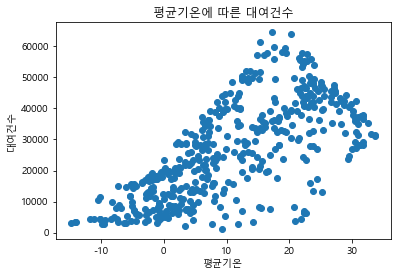

In [9]:
temp = seoul_bike['평균기온']
bike = seoul_bike['대여건수']

plt.scatter(temp, bike)

plt.title('평균기온에 따른 대여건수')
plt.xlabel('평균기온')
plt.ylabel('대여건수')

plt.show()

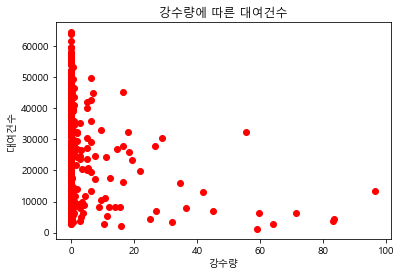

In [10]:
rain = seoul_bike['강수량']

plt.scatter(rain, bike, color="r")

plt.title('강수량에 따른 대여건수')
plt.xlabel('강수량')
plt.ylabel('대여건수')

plt.show()

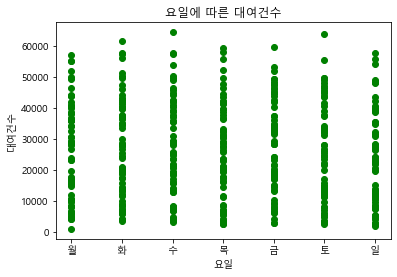

In [11]:
week = seoul_bike['요일']

plt.scatter(week, bike, c='g')

plt.title('요일에 따른 대여건수')
plt.xlabel('요일')
plt.ylabel('대여건수')

plt.show()

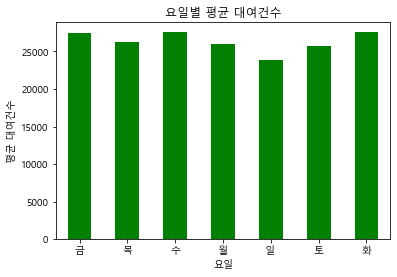

In [12]:
week_group = seoul_bike.groupby('요일').mean()['대여건수']

week_group.plot(kind = 'bar', color = 'g', rot = 0)

plt.title('요일별 평균 대여건수')
plt.xlabel('요일')
plt.ylabel('평균 대여건수')

plt.show()

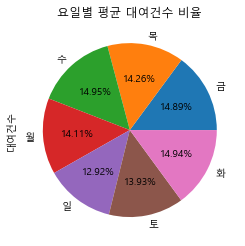

In [13]:
week_group.plot(kind='pie', autopct = "%.2f%%")
plt.title('요일별 평균 대여건수 비율')
plt.show()

In [14]:
week_one_hot = pd.get_dummies(week)
df_bike_new = pd.concat([seoul_bike, week_one_hot], axis = 1)
df_bike_new.head()

,대여일자,대여건수,평균기온,강수량,요일,금,목,수,월,일,토,화
0,2018-01-01,4950,-1.3,0.0,월,0,0,0,1,0,0,0
1,2018-01-02,7136,-1.8,0.0,화,0,0,0,0,0,0,1
2,2018-01-03,7156,-4.7,0.0,수,0,0,1,0,0,0,0
3,2018-01-04,7102,-4.7,0.0,목,0,1,0,0,0,0,0
4,2018-01-05,7705,-3.0,0.0,금,1,0,0,0,0,0,0


In [15]:
df_bike_new.drop(['대여일자'], axis = 1, inplace = True)
df_bike_new.drop(['요일'], axis = 1, inplace = True)

df_bike_new.head()

,대여건수,평균기온,강수량,금,목,수,월,일,토,화
0,4950,-1.3,0.0,0,0,0,1,0,0,0
1,7136,-1.8,0.0,0,0,0,0,0,0,1
2,7156,-4.7,0.0,0,0,1,0,0,0,0
3,7102,-4.7,0.0,0,1,0,0,0,0,0
4,7705,-3.0,0.0,1,0,0,0,0,0,0


In [16]:
data_input = df_bike_new.drop(['대여건수'], axis = 1)
print(data_input.shape)

data_target = df_bike_new['대여건수']
print(data_target.shape)

(455, 9)
(455,)


In [17]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(data_input, data_target, shuffle = True)

print(input_train.shape, target_train.shape)
print(input_test.shape, target_test.shape)

(341, 9) (341,)
(114, 9) (114,)


In [18]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(input_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
input_bike_data = [[0,0,0,0,0,0,0,0,0]]

input_bike_data[0][0] = float(input("해당 날짜의 평균 기온은? : "))
input_bike_data[0][1] = float(input("해당 날짜의 강수량은? : "))
today = input("해당 날짜의 요일은? (월, 화, 수, 목, 금, 토, 일) : ")

if(today == "금"): input_bike_data[0][2] = 1
elif(today == "목"): input_bike_data[0][3] = 1
elif(today == "수"): input_bike_data[0][4] = 1
elif(today == "월"): input_bike_data[0][5] = 1
elif(today == "일"): input_bike_data[0][6] = 1
elif(today == "화"): input_bike_data[0][7] = 1
elif(today == "토"): input_bike_data[0][8] = 1

print(input_bike_data)

해당 날짜의 평균 기온은? : 18
해당 날짜의 강수량은? : 0
해당 날짜의 요일은? (월, 화, 수, 목, 금, 토, 일) : 월
[[18.0, 0.0, 0, 0, 0, 1, 0, 0, 0]]


In [22]:
bike_rent = int(model_lr.predict(input_bike_data))
print("예상되는 공공자전거 대여 건수 : ", bike_rent, "대")

예상되는 공공자전거 대여 건수 :  34635 대
